<a href="https://colab.research.google.com/github/beulah-s/DS_Bootcamp_2023/blob/main/HW9_samuel_beulah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Neural Nets with Keras**

In [1]:
# keras.io code:
from keras.layers import Dense
output_layer = Dense(10)

# corresponding tf.keras code:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

# or:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [2]:
%matplotlib inline
%load_ext tensorboard
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [3]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
matplotlib 3.7.1
numpy 1.23.5
pandas 1.5.3
sklearn 1.2.2
tensorflow 2.12.0
tensorflow.keras 2.12.0


In [4]:
assert sys.version_info >= (3, 5) # Python ≥3.5 required
assert tf.__version__ >= "2.0"    # TensorFlow ≥2.0 required

####**Exercise 1 - Tensorflow playground**
#####https://colab.research.google.com/corgiredirector?site=http%3A%2F%2Fplayground.tensorflow.org

####**Exercise 2 – Image classification with tf.keras**

In [5]:
#Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data())
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  44, 127,
        182, 185, 161, 120,  55,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 198, 251, 255,
        251, 249, 247, 255, 252, 214, 100,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   2,   0,   0, 233, 252, 237, 239,
        234, 237, 235, 237, 237, 254, 227,   0,   0,   0,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  16, 210, 225, 215, 175,
        217, 216, 193, 196, 226, 221, 209,  50,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 199, 229, 232, 230, 245, 204,
        219, 253, 245, 207, 194, 223, 231, 236, 235,   0,   0,   3,   0,
          0,   0],
       [  

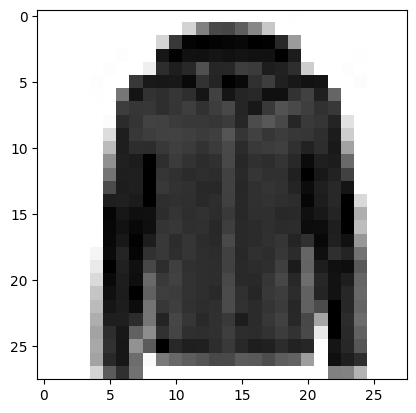

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [9]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Coat'

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

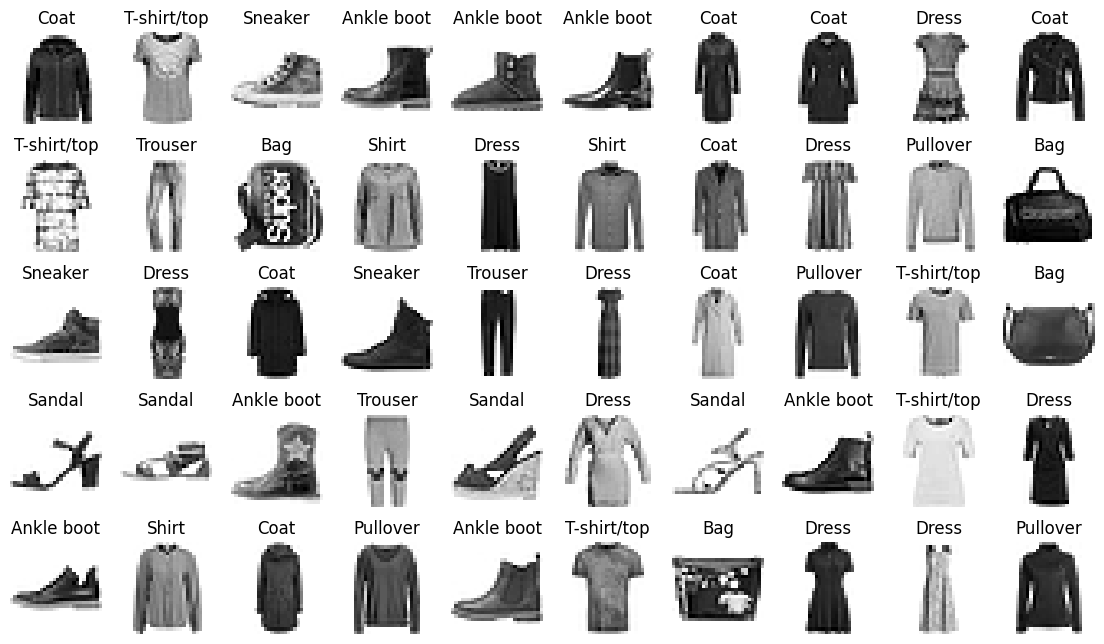

In [14]:
# Sample of images in the dataset
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

####**Build a classification neural network with Keras**

In [15]:
#2.1 Build a sequential model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))

In [16]:
#2.2 pass through 4 layers
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [17]:
model.layers

In [18]:
#2.3
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


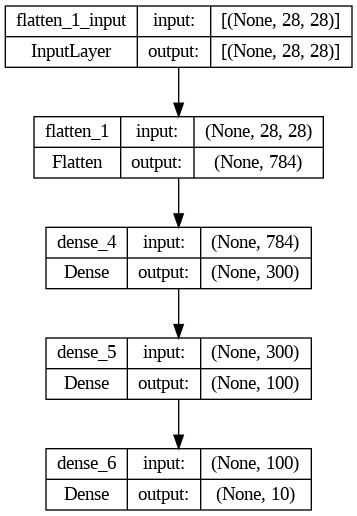

In [19]:
# Save image of model architecture
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

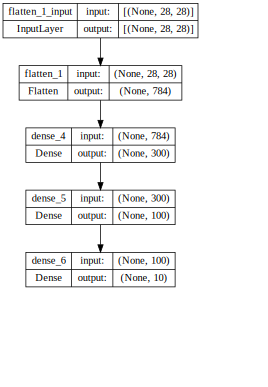

In [20]:
from IPython.display import SVG
SVG(keras.utils.model_to_dot(model, show_shapes=True).create(prog="dot", format="svg"))

In [21]:
#2.4
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [22]:
#2.5
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 551872751728590848.0000 - accuracy: 0.0985 - val_loss: 2.3411 - val_accuracy: 0.0986
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3412 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3412 - val_accuracy: 0.0976
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3412 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3414 - val_accuracy: 0.0914
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3413 - val_accuracy: 0.0980
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.34

(0.0, 1.0)

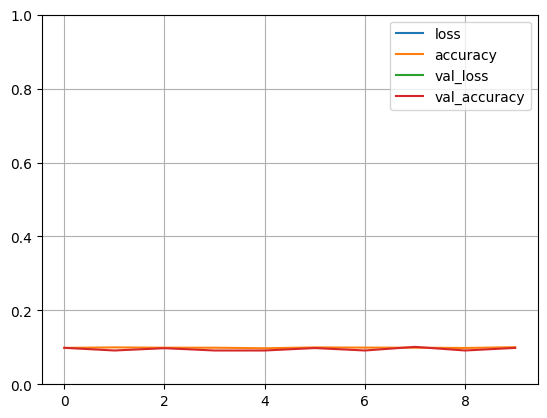

In [23]:
# 2.6 Plot history
pd.DataFrame(history.history).plot()
figsize=(8, 5)
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [24]:
# 2.7
model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3412 - val_accuracy: 0.0914
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3415 - val_accuracy: 0.0914
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3414 - val_accuracy: 0.0914
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3413 - val_accuracy: 0.0914
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3412 - val_accuracy: 0.0976
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3413 - val_accuracy: 0.0980
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3412 - val_accuracy

In [25]:
# 2.8
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3051 - accuracy: 0.1000


[2.3051018714904785, 0.10000000149011612]

In [26]:
# 2.9 Define X_new as the first 10 instances of the test set
n_new = 10
X_new = X_test[:n_new]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 107ms/step


array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

In [27]:
# 2.10
y_pred = y_proba.argmax(axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
# 2.11
y_proba.max(axis=1).round(2)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], dtype=float32)

In [29]:
# 2.12
k = 3
top_k = np.argsort(-y_proba, axis=1)[:, :k]
top_k

array([[0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6],
       [0, 4, 6]])

In [30]:
row_indices = np.tile(np.arange(len(top_k)), [k, 1]).T
y_proba[row_indices, top_k].round(2)

array([[0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1]], dtype=float32)

#### **3. Scaling features**

In [31]:
pixel_means = X_train.mean(axis = 0)
pixel_stds = X_train.std(axis = 0)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

In [33]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(1e-3), metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.9433 - accuracy: 0.6876 - val_loss: 0.6351 - val_accuracy: 0.7818
Epoch 2/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5834 - accuracy: 0.7967 - val_loss: 0.5331 - val_accuracy: 0.8202
Epoch 3/20
1719/1719 [==============================] - 11s 7ms/step - loss: 0.5091 - accuracy: 0.8200 - val_loss: 0.4869 - val_accuracy: 0.8396
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4685 - accuracy: 0.8340 - val_loss: 0.4608 - val_accuracy: 0.8486
Epoch 5/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4416 - accuracy: 0.8433 - val_loss: 0.4411 - val_accuracy: 0.8566
Epoch 6/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4220 - accuracy: 0.8495 - val_loss: 0.4284 - val_accuracy: 0.8584
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4065 - accuracy: 0.8550 - val_loss: 0.4182 - val_accu

In [34]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8640


[0.3814321756362915, 0.8640000224113464]

#### **4. Use Callbacks**

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(1e-3), metrics=["accuracy"])

In [38]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [39]:
logdir = os.path.join(root_logdir, "run_{}".format(time.time()))

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=5),
    keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True),
]
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/50
1719/1719 [==============================] - 18s 9ms/step - loss: 0.9333 - accuracy: 0.7002 - val_loss: 0.6255 - val_accuracy: 0.7896
Epoch 2/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5763 - accuracy: 0.8011 - val_loss: 0.5215 - val_accuracy: 0.8196
Epoch 3/50
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5021 - accuracy: 0.8238 - val_loss: 0.4739 - val_accuracy: 0.8342
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4633 - accuracy: 0.8378 - val_loss: 0.4467 - val_accuracy: 0.8472
Epoch 5/50
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4380 - accuracy: 0.8455 - val_loss: 0.4287 - val_accuracy: 0.8550
Epoch 6/50
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4193 - accuracy: 0.8517 - val_loss: 0.4158 - val_accuracy: 0.8600
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4049 - accuracy: 0.8568 - val_loss: 0.4057 - val_accu

In [40]:
# 4.2
%tensorboard --logdir {root_logdir}

<IPython.core.display.Javascript object>

In [41]:
# 4.3
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 3ms/step - loss: 0.3187 - accuracy: 0.8852


[0.31873050332069397, 0.885200023651123]

#### **5. A neural net for regression**

In [42]:
# 5.1 California housing data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [43]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [44]:
housing.data.shape

(20640, 8)

In [45]:
housing.target.shape

(20640,)

In [46]:
# 5.2
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [47]:
len(X_train), len(X_valid), len(X_test)

(11610, 3870, 5160)

In [48]:
# 5.3
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [49]:
# 5.4
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(1e-3))

In [50]:
callbacks = [keras.callbacks.EarlyStopping(patience=10)]
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid), epochs=100,
                    callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 4s 9ms/step - loss: 1.8841 - val_loss: 0.8418
Epoch 2/100
363/363 [==============================] - 3s 7ms/step - loss: 0.7778 - val_loss: 0.7579
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6973 - val_loss: 0.7402
Epoch 4/100
363/363 [==============================] - 1s 4ms/step - loss: 0.6473 - val_loss: 0.5939
Epoch 5/100
363/363 [==============================] - 2s 4ms/step - loss: 0.6049 - val_loss: 0.5983
Epoch 6/100
363/363 [==============================] - 1s 4ms/step - loss: 0.5709 - val_loss: 0.5368
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5415 - val_loss: 0.5501
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5189 - val_loss: 0.4908
Epoch 9/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4999 - val_loss: 0.4727
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4849 - val_lo

In [51]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3877


0.38773778080940247

In [52]:
model.predict(X_test_scaled)

162/162 [==============================] - 0s 1ms/step


array([[0.67929065],
       [1.6973372 ],
       [3.7123272 ],
       ...,
       [1.404758  ],
       [2.6054835 ],
       [3.922883  ]], dtype=float32)